In [1]:
import pdftotext

In [2]:
with open("/Users/shiqinchoo/Desktop/summary/mgbio.pdf","rb") as f:
    pdf = pdftotext.PDF(f)

In [3]:
len(pdf)

200

In [4]:
type(pdf)

pdftotext.PDF

In [5]:
str(pdf)

'<pdftotext.PDF object at 0x7f91b9c15738>'

In [6]:
type(pdf)

pdftotext.PDF

In [7]:
pdf = "\n\n".join(pdf)

In [8]:
f2 = open("/Users/shiqinchoo/Desktop/summary/mgbio2.txt","w+")
f2.write(pdf)
f2.close()

In [9]:
j = open("/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt","w+")

In [10]:
with open("/Users/shiqinchoo/Desktop/summary/mgclimate/mgclimate.pdf","rb") as k:
    pdf = pdftotext.PDF(k)

In [11]:
k = "\n\n".join(pdf)

In [12]:
j.write(k)

685510

In [13]:
type(k)

str

In [14]:
import spacy
nlp = spacy.load('/opt/anaconda3/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.2.5/')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [15]:
import pandas as pd
import os

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shiqinchoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [18]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiqinchoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [20]:
import random
#get tokens
text_data=[]
with open('/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt','r') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

[]
['mckinsey', 'focus', 'issue', 'environmental', 'sustainability', 'dating', 'client', 'study']
['vietnam', 'asian', 'development', 'director', 'technology']
['extreme', 'proximity', 'physical', 'damage', '100‑year', 'flood', 'could', 'yield', 'could', 'improve', 'canada']
['socioeconomic', 'system', 'micro', 'approach', 'offer', 'decision', 'maker']
[]
[]
['cool', 'evaporation', 'constant', 'pressure', 'threshold', 'chosen', 'commonly', 'define', 'threshold']
['survive', 'outdoors', 'hours', 'projection', 'subject', 'uncertainty', 'relate', 'future', 'behavior']
['take', 'world', 'resource', 'institute', 'water', 'atlas', 'rely', 'underlie', 'cmip5', 'model']
['specifically', 'look', 'impact', 'climate', 'change', 'livability', 'workability', 'india']
[]
['find', 'upward', 'trend', 'economic', 'impact', 'normalize', 'damage', 'indeed', 'decrease', 'weather', '/climate']
['expansive', 'coastline', 'elevation', 'porous', 'limestone', 'foundation', 'make', 'vulnerable']
['uritizations'

In [21]:
import gensim
from gensim.utils import simple_preprocess
# Build the bigram and trigram models
bigram = gensim.models.Phrases(text_data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[text_data], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [22]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [23]:
stop_words = stopwords.words('english')

In [24]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [25]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(text_data)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [26]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [27]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:10])

[[], [(0, 1), (1, 1), (2, 1), (3, 1)], [], [(4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1), (15, 1), (16, 1)], [], [], [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2)], [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1)]]


In [28]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [29]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.038*"impact" + 0.019*"capital" + 0.019*"assessment" + 0.019*"level" + '
  '0.019*"geospatial" + 0.019*"sector" + 0.019*"infrastructure" + '
  '0.019*"threshold" + 0.019*"define" + 0.019*"follow"'),
 (1,
  '0.054*"region" + 0.028*"model" + 0.028*"would" + 0.028*"raise" + '
  '0.028*"well" + 0.028*"outcome" + 0.028*"volatility" + 0.028*"skew" + '
  '0.028*"rely" + 0.028*"take"'),
 (2,
  '0.026*"extreme" + 0.026*"flood" + 0.026*"study" + 0.026*"event" + '
  '0.026*"weather" + 0.026*"wildfire" + 0.026*"drought" + 0.026*"storm" + '
  '0.026*"prolong" + 0.026*"issue"'),
 (3,
  '0.027*"exposure" + 0.027*"constant" + 0.027*"increase" + '
  '0.027*"temperature" + 0.027*"today" + 0.027*"economic" + 0.027*"climate" + '
  '0.027*"damage" + 0.014*"asset" + 0.014*"factor"'),
 (4,
  '0.049*"could" + 0.033*"physical" + 0.033*"damage" + 0.018*"extreme" + '
  '0.018*"country" + 0.018*"yield" + 0.018*"expect" + 0.018*"number" + '
  '0.018*"stock" + 0.018*"flood"'),
 (5,
  '0.035*"climate" + 0.0

In [30]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [31]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.186251  0.047938       1        1  20.598696
3      0.077562  0.112829       2        1  13.773542
9      0.038630 -0.120390       3        1  11.368644
4      0.022359  0.074402       4        1   9.985085
7      0.083112  0.056715       5        1   9.753409
8     -0.072423 -0.019024       6        1   9.366957
5      0.028341 -0.097720       7        1   8.869494
6     -0.002353 -0.028786       8        1   6.613896
2      0.001678 -0.002263       9        1   5.207090
1      0.009344 -0.023701      10        1   4.463184, topic_info=    Category      Freq         Term     Total  loglift  logprob
5    Default  6.000000       damage  6.000000  30.0000   30.000
60   Default  3.000000   widespread  3.000000  29.0000   29.000
135  Default  2.000000       region  2.000000  28.0000   28.000
4    Default  2.000000        could  2.000000  27.0000   27.000
97   Default  2.000000      example  2.000000  26.0000   26.000
92   Default  2.000000    insurance  2.000000  25.0000   25.000
85   Default  3.000000     exposure  3.000000  24.0000   24.000
26   Default  2.000000   projection  2.000000  23.0000   23.000
82   Default  2.000000        asset  2.000000  22.0000   22.000
129  Default  1.000000        raise  1.000000  21.0000   21.000
58   Default  1.000000       severe  1.000000  20.0000   20.000
59   Default  1.000000     specific  1.000000  19.0000   19.000
57   Default  1.000000     moderate  1.000000  18.0000   18.000
25   Default  2.000000         hour  2.000000  17.0000   17.000
151  Default  1.000000        would  1.000000  16.0000   16.000
2    Default  2.000000        study  2.000000  15.0000   15.000
6    Default  2.000000      extreme  2.000000  14.0000   14.000
31   Default  1.000000        model  1.000000  13.0000   13.000
7    Default  2.000000        flood  2.000000  12.0000   12.000
9    Default  1.000000     physical  1.000000  11.0000   11.000
37   Default  4.000000       impact  4.000000  10.0000   10.000
131  Default  1.000000        event  1.000000   9.0000    9.000
63   Default  1.000000       number  1.000000   8.0000    8.000
36   Default  9.000000      climate  9.000000   7.0000    7.000
35   Default  5.000000       change  5.000000   6.0000    6.000
79   Default  1.000000         cool  1.000000   5.0000    5.000
123  Default  1.000000        human  1.000000   4.0000    4.000
48   Default  1.000000      weather  1.000000   3.0000    3.000
121  Default  3.000000  temperature  3.000000   2.0000    2.000
111  Default  3.000000       global  3.000000   1.0000    1.000
..       ...       ...          ...       ...      ...      ...
181  Topic10  0.043597     wildfire  1.042094  -0.0647   -5.961
179  Topic10  0.043597      prolong  1.042094  -0.0647   -5.961
178  Topic10  0.043597      drought  1.042094  -0.0647   -5.961
180  Topic10  0.043597        storm  1.042094  -0.0647   -5.961
220  Topic10  0.043597         life  1.105403  -0.1237   -5.961
235  Topic10  0.043597      program  1.105403  -0.1237   -5.961
218  Topic10  0.043597       affect  1.105403  -0.1237   -5.961
219  Topic10  0.043597         area  1.105403  -0.1237   -5.961
234  Topic10  0.043597         give  1.105403  -0.1237   -5.961
96   Topic10  0.043597        allow  1.105404  -0.1237   -5.961
117  Topic10  0.043597     regional  1.105405  -0.1237   -5.961
99   Topic10  0.043597     transfer  1.105404  -0.1237   -5.961
118  Topic10  0.043597         tool  1.105405  -0.1237   -5.961
112  Topic10  0.043597       hazard  1.105405  -0.1237   -5.961
82   Topic10  0.043597        asset  2.367971  -0.8855   -5.961
36   Topic10  0.043597      climate  9.263639  -2.2496   -5.961
138  Topic10  0.043597        today  1.906430  -0.6687   -5.961
9    Topic10  0.043597     physical  1.786209  -0.6036   -5.961
101  Topic10  0.043597       carbon  2.570508  -0.9676   -5.961
5    Topic10  0.043597       damage  6.763015

In [32]:
lda_model50 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=50, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

from pprint import pprint
# Print the Keyword in the 25 topics
pprint(lda_model50.print_topics())
doc_lda50 = lda_model50[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model50, corpus, id2word, mds='mmds')
LDAvis_prepared

[(15,
  '0.060*"correct" + 0.060*"follow" + 0.060*"climatic" + 0.060*"practice" + '
  '0.060*"behavior" + 0.060*"state" + 0.060*"multidecade" + 0.060*"define" + '
  '0.060*"standard" + 0.060*"average"'),
 (7,
  '0.114*"agricultural" + 0.114*"climate" + 0.114*"beneficiary" + '
  '0.114*"expect" + 0.002*"wind" + 0.002*"tower" + 0.002*"reservoir" + '
  '0.002*"freshwater" + 0.002*"kilometer" + 0.002*"protein"'),
 (4,
  '0.119*"increase" + 0.060*"biome" + 0.060*"working" + 0.060*"could" + '
  '0.060*"large" + 0.060*"expect" + 0.060*"disappear" + 0.060*"number" + '
  '0.060*"change" + 0.060*"average"'),
 (14,
  '0.036*"shelter" + 0.036*"work" + 0.036*"erect" + 0.036*"global" + '
  '0.036*"worker" + 0.036*"future" + 0.036*"hour" + 0.036*"adjust" + '
  '0.036*"geospatial" + 0.036*"current"'),
 (11,
  '0.004*"percent" + 0.004*"site" + 0.004*"tower" + 0.004*"reservoir" + '
  '0.004*"freshwater" + 0.004*"wind" + 0.004*"performance" + 0.004*"kilometer" '
  '+ 0.004*"level" + 0.004*"protein"'),
 (

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
30     0.104557  0.340159       1        1  5.842610
14     0.263061  0.203872       2        1  5.665442
27    -0.211577  0.242275       3        1  4.644168
12    -0.042785  0.311158       4        1  4.308490
48     0.196411 -0.259155       5        1  4.048302
42     0.361656 -0.110113       6        1  4.047571
24    -0.152433  0.266923       7        1  3.789162
36    -0.150914 -0.323999       8        1  3.745380
5     -0.313207  0.052670       9        1  3.527195
15     0.191592  0.197077      10        1  3.217677
18     0.294077  0.060845      11        1  3.010485
4      0.021522  0.257090      12        1  3.008914
23    -0.275444 -0.047679      13        1  2.955516
6     -0.207961  0.149601      14        1  2.955515
29     0.263213 -0.126790      15        1  2.825588
22    -0.260004  0.077814      16        1  2.755428
13    -0.142800  0.172778      17        1  2.504768
10    -0.246703 -0.117431      18        1  2.504768
21     0.113055  0.224702      19        1  2.493775
20     0.240687 -0.009763      20        1  2.238718
44    -0.188416 -0.179493      21        1  2.174953
37     0.045448 -0.269569      22        1  2.171289
43     0.174690  0.122833      23        1  2.171288
25    -0.192278 -0.018931      24        1  1.911101
34    -0.105819 -0.218795      25        1  1.911101
45     0.176157 -0.122912      26        1  1.746193
19     0.103721 -0.169325      27        1  1.651961
41    -0.160212  0.032887      28        1  1.651961
8      0.058310 -0.197524      29        1  1.651961
0     -0.018740 -0.209227      30        1  1.651961
1     -0.060548 -0.163754      31        1  1.315236
7     -0.108206 -0.055137      32        1  1.139334
35    -0.029122  0.101111      33        1  1.020600
46     0.037621 -0.089430      34        1  0.888674
31     0.091244 -0.045451      35        1  0.888674
33     0.090251  0.023360      36        1  0.888674
40     0.055242  0.062433      37        1  0.888674
28    -0.039096 -0.045875      38        1  0.646810
26     0.002021 -0.010099      39        1  0.295007
2      0.001975 -0.009921      40        1  0.295007
3      0.001975 -0.009921      41        1  0.295007
47     0.001975 -0.009921      42        1  0.295007
9      0.001975 -0.009921      43        1  0.295007
39     0.001975 -0.009921      44        1  0.295007
38     0.001975 -0.009921      45        1  0.295007
11     0.001975 -0.009921      46        1  0.295007
32     0.001975 -0.009921      47        1  0.295007
16     0.001975 -0.009921      48        1  0.295007
17     0.001975 -0.009921      49        1  0.295007
49     0.001975 -0.009921      50        1  0.295007, topic_info=    Category      Freq           Term     Total  loglift  logprob
5    Default  7.000000         damage  7.000000  30.0000  30.0000
36   Default  9.000000        climate  9.000000  29.0000  29.0000
35   Default  5.000000         change  5.000000  28.0000  28.0000
60   Default  3.000000     widespread  3.000000  27.0000  27.0000
121  Default  3.000000    temperature  3.000000  26.0000  26.0000
85   Default  3.000000       exposure  3.000000  25.0000  25.0000
111  Default  3.000000         global  3.000000  24.0000  24.0000
92   Default  3.000000      insurance  3.000000  23.0000  23.0000
101  Default  2.000000         carbon  2.000000  22.0000  22.0000
37   Default  4.000000         impact  4.000000  21.0000  21.0000
24   Default  4.000000         future  4.000000  20.0000  20.0000
97   Default  2.000000        example  2.000000  19.0000  19.0000
82   Default  2.000000          asset  2.000000  18.0000  18.0000
26   Default  2.000000     projection  2.000000  17.0000  17.0000
144  Default  2.000000        country  2.000000  16.0000  16.0000
6    Default  2.000000        extreme  2.000000  15.0000  15.0000
74   Default  2.000000         expect  2.000000  14.0000  14.0000
4    Default 

In [33]:
import neuralcoref

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
  return f(*args, **kwds)


In [34]:
neuralcoref.add_to_pipe(nlp)

In [35]:
f = open('/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt','r')
g = f.read()

In [36]:
doc = nlp(g)

In [37]:
entities = [ent.text for ent in doc.ents]

len(entities)

8726

In [38]:
labels = [ent.label_ for ent in doc.ents]

len(labels)

8726

In [39]:
doc_ents = pd.DataFrame()
doc_ents['entities'] = entities
doc_ents['labels'] = labels

df = doc_ents.groupby(['entities', 'labels']).size()
df = df.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()

In [40]:
import pandas as pd
import re


def entity_pairs(text, coref=True):
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters
    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = list()
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span) for span in spans]
        dep = [token.dep_ for token in sent]
        if (dep.count('obj')+dep.count('dobj'))==1 \
                and (dep.count('subj')+dep.count('nsubj'))==1:
            for token in sent:
                if token.dep_ in ('obj', 'dobj'):  # identify object nodes
                    subject = [w for w in token.head.lefts if w.dep_
                               in ('subj', 'nsubj')]  # identify subject nodes
                    if subject:
                        subject = subject[0]
                        # identify relationship by root dependency
                        relation = [w for w in token.ancestors if w.dep_ == 'ROOT']  
                        if relation:
                            relation = relation[0]
                            # add adposition or particle to relationship
                            if relation.nbor(1).pos_ in ('ADP', 'PART'):  
                                relation = ' '.join((str(relation),
                                        str(relation.nbor(1))))
                        else:
                            relation = 'unknown'
                        subject, subject_type = refine_ent(subject, sent)
                        token, object_type = refine_ent(token, sent)
                        ent_pairs.append([str(subject), str(relation), str(token),
                                str(subject_type), str(object_type)])
    filtered_ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(x) == '' for x in sublist)]
    pairs = pd.DataFrame(filtered_ent_pairs, columns=['subject',
                         'relation', 'object', 'subject_type',
                         'object_type'])
    print('Entity pairs extracted:', str(len(filtered_ent_pairs)))
    return pairs


def refine_ent(ent, sent):
    unwanted_tokens = (
        'PRON',  # pronouns
        'PART',  # particle
        'DET',  # determiner
        'SCONJ',  # subordinating conjunction
        'PUNCT',  # punctuation
        'SYM',  # symbol
        'X',  # other
        )
    ent_type = ent.ent_type_  # get entity type
    if ent_type == '':
        ent_type = 'NOUN_CHUNK'
        ent = ' '.join(str(t.text) for t in
                nlp(str(ent)) if t.pos_
                not in unwanted_tokens and t.is_stop == False)
    elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
        t = ''
        for i in range(len(sent) - ent.i):
            if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                t += ' ' + str(ent.nbor(i))
            else:
                ent = t.strip()
                break
    return ent, ent_type

In [41]:
h = entity_pairs(g)
len(h)

Entity pairs extracted: 333


333

In [42]:
h.to_csv('/Users/shiqinchoo/Desktop/summary/mgclimate/climate_pairs.csv')

In [43]:
type(h)

pandas.core.frame.DataFrame

In [44]:
h.head()

subject   relation                                          object  \
0   MGI research   combines                                     disciplines   
1  James Manyika  employing                                       Sven Smit   
2            MGI       have                               MGI senior fellow   
3       Practice      helps                                      businesses   
4  organizations       help  risk capabilities.sustainable - growth economy   

  subject_type object_type  
0   NOUN_CHUNK  NOUN_CHUNK  
1       PERSON      PERSON  
2          ORG  NOUN_CHUNK  
3   NOUN_CHUNK  NOUN_CHUNK  
4   NOUN_CHUNK  NOUN_CHUNK

In [45]:
org_kg = h[(h['subject_type']=='ORG') | (h['object_type']=='ORG')]
org_kg

subject     relation  \
2                                                  MGI         have   
5                                             McKinsey    developed   
7                                              Birshan     provided   
8                           Woods Hole Research Center     produced   
9    the University of Oxford’s Environmental Chang...       ensure   
12                                       Organizations      include   
22                                            McKinsey          has   
84                        Intensifying climate.hazards          put   
126                                           Each RCP     predicts   
136                       the US Department of Defense   identified   
222                                biosphere.currently      absorbs   
228                   IHS Markit Economics and Country  changing.in   
234                                               UNEP   identified   
235                                            the GCA   calculated   
236                                            the GCA   identified   
289               The World Climate Research Programme      brought   
293                                           Each RCP     predicts   
325  Estimated work       model multi-member ensemb...       assess   
327                                            Lascell        yield   

                                                object subject_type  \
2                                    MGI senior fellow          ORG   
5    McKinsey global greenhouse gas abatement cost ...          ORG   
7                                       critical input          ORG   
8                                           scientific          ORG   
9                                         impartiality          ORG   
12                                               AECOM   NOUN_CHUNK   
22                                        long history          ORG   
84                           millions of lives at risk          ORG   
126                             global average.warming          ORG   
136                                     climate change          ORG   
222                           approximately 30 percent          ORG   
228                                  systems framework          ORG   
234                                   adaptation costs          ORG   
235                   necessary adaptation investments          ORG   
236                                         categories          ORG   
289                                     climate models          ORG   
293                                     global average          ORG   
325                             climate change impacts          ORG   
327                                potential yield gap          ORG   

    object_type  
2    NOUN_CHUNK  
5    NOUN_CHUNK  
7    NOUN_CHUNK  
8    NOUN_CHUNK  
9    NOUN_CHUNK  
12          ORG  
22   NOUN_CHUNK  
84     CARDINAL  
126  NOUN_CHUNK  
136  NOUN_CHUNK  
222     PERCENT  
228  NOUN_CHUNK  
234  NOUN_CHUNK  
235  NOUN_CHUNK  
236  NOUN_CHUNK  
289  NOUN_CHUNK  
293  NOUN_CHUNK  
325  NOUN_CHUNK  
327  NOUN_CHUNK

In [46]:
gpe_kg = h[(h['subject_type']=='GPE') | (h['object_type']=='GPE')]

In [47]:
gpe_kg

subject    relation                     object subject_type  \
96                 group    includes            the Philippines   NOUN_CHUNK   
98                 group    includes                   Colombia   NOUN_CHUNK   
100                group    includes                    Germany   NOUN_CHUNK   
102             Examples     include                  Argentina   NOUN_CHUNK   
161  rising temperatures      impact                      India   NOUN_CHUNK   
187                India         has                  potential          GPE   
205     Hurricane Harvey       Texas                    Houston        EVENT   
254                China         see            expected yields          GPE   
262                group    includes            the Philippines   NOUN_CHUNK   
263                group    includes                   Colombia   NOUN_CHUNK   
264                group    includes                      Egypt   NOUN_CHUNK   
267                group    includes                    Germany   NOUN_CHUNK   
268             Examples     include                  Argentina   NOUN_CHUNK   
274           Bangladesh        have  relatively low GDP levels          GPE   
282               Quebec  prohibited                   building          GPE   
284               Canada       tries           forceful message          GPE   

    object_type  
96          GPE  
98          GPE  
100         GPE  
102         GPE  
161         GPE  
187  NOUN_CHUNK  
205         GPE  
254  NOUN_CHUNK  
262         GPE  
263         GPE  
264         GPE  
267         GPE  
268         GPE  
274  NOUN_CHUNK  
282  NOUN_CHUNK  
284  NOUN_CHUNK

In [48]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(150, 120), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=50,
        linewidths=13,
        pos=layout,
        font_size = 48,
        edge_color='blue',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

In [49]:

def filter_graph(pairs, node):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    edges = nx.dfs_successors(k_graph, node)
    nodes = []
    for k, v in edges.items():
        nodes.extend([k])
        nodes.extend(v)
    subgraph = k_graph.subgraph(nodes)
    layout = (nx.random_layout(k_graph))
    nx.draw_networkx(
        subgraph,
        node_size=1000,
        arrowsize=20,
        linewidths=3,
        pos=layout,
        font_size = 24,
        edge_color='red',
        edgecolors='black',
        node_color='white'
        )
    labels = dict(zip((list(zip(pairs.subject, pairs.object))),
                    pairs['relation'].tolist()))
    edges= tuple(subgraph.out_edges(data=False))
    sublabels ={k: labels[k] for k in edges}
    print(k_graph.out_edges(data=False))
    nx.draw_networkx_edge_labels(subgraph, pos=layout, edge_labels=sublabels,
                                font_color='red')
    plt.axis('off')
    plt.show()

[('MGI research', 'disciplines'), ('James Manyika', 'Sven Smit'), ('MGI', 'MGI senior fellow'), ('Practice', 'businesses'), ('organizations', 'risk capabilities.sustainable - growth economy'), ('McKinsey', 'McKinsey global greenhouse gas abatement cost curve'), ('McKinsey', 'long history'), ('Quiros', 'modeling'), ('Birshan', 'critical input'), ('Woods Hole Research Center', 'scientific'), ('the University of Oxford’s Environmental Change Institute', 'impartiality'), ('Carlos Sanchez', 'resilient finance'), ('number', 'number'), ('Organizations', 'AECOM'), ('Multiple groups', 'Multiple groups'), ('colleagues', 'valuable input'), ('Peter Gumbel', 'Peter Gumbel'), ('Climate science          humidity increase', 'exposed homes.makes extensive use'), ('Poorer regions', 'climates.enables'), ('Climate change', 'exposure'), ('Climate change', 'benefits'), ('Climate change', 'substantial physical impacts'), ('Climate change', 'human life'), ('Climate change', 'measurable socioeconomic impact'),

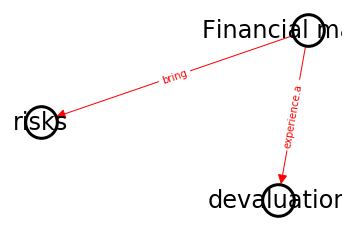

In [50]:
filter_graph(h, 'Financial markets')

In [51]:
draw_kg(gpe_kg)

In [52]:
draw_kg(org_kg)

In [53]:
import sys
sys.path.append('/opt/anaconda3/lib/python3.7/site-packages/')
import nxviz 
from nxviz import CircosPlot

In [54]:
gpe_graph = nx.from_pandas_edgelist(gpe_kg, 'subject','object',create_using=nx.MultiDiGraph())
node_deg = nx.degree(gpe_graph)

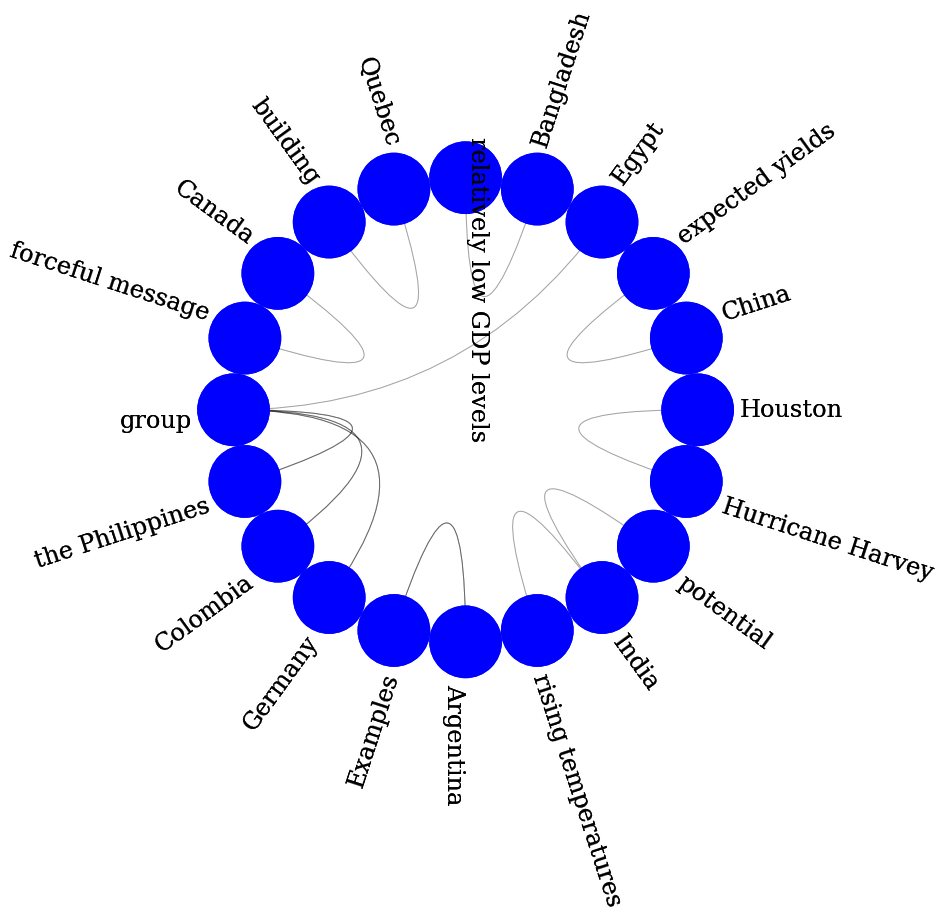

In [55]:
c = CircosPlot(gpe_graph, figsize=(10,10),node_labels=True, fontsize = 24, node_label_layout='rotation')
plt.tight_layout(rect=(0.10,0.10,0.95,0.95))
c.draw()
c.draw_nodes()
c.draw_edges()
plt.show()

In [56]:
h2_1 = h[h['subject'].str.contains("climate")]
h2_2 = h[h['object'].str.contains("climate")]
h3 = pd.concat([h2_1, h2_2])
h3

subject             relation  \
19                                    changing climate               impact   
42                                      climate models             indicate   
55                                     climate hazards               impact   
80                                      climate events                 lack   
81                                      climate events              trigger   
82                                    changing climate              affects   
84                        Intensifying climate.hazards                  put   
90                               Köppen climate system              divides   
101                              polar boreal climates  largest increase in   
113                                   changing climate                means   
127                                     climate models                 have   
142                                   changing climate              affects   
151                                     climate models              project   
223                                   changing climate             increase   
233                            Growing climate hazards                  put   
261                              Köppen climate system              divides   
285                  Paris Agreement climate proposals                 need   
294                                     climate change            points to   
17                                      Poorer regions                 have   
29                                           Emissions            influence   
90                               Köppen climate system              divides   
136                       the US Department of Defense           identified   
240                                         economists                treat   
260                                         25 percent          experienced   
261                              Köppen climate system              divides   
266                                              share             changing   
289               The World Climate Research Programme              brought   
296                                             buyers            recognize   
312                                            ability              exposed   
313                                            drought              exposed   
316                                            drought              exposed   
317                                            drought              exposed   
319                                            drought              exposed   
321                                            drought              exposed   
325  Estimated work       model multi-member ensemb...               assess   

                                   object subject_type object_type  
19                  socioeconomic systems   NOUN_CHUNK  NOUN_CHUNK  
42                                   rise   NOUN_CHUNK  NOUN_CHUNK  
55                       multiple systems   NOUN_CHUNK  NOUN_CHUNK  
80                        financial means   NOUN_CHUNK  NOUN_CHUNK  
81                        harvest failure   NOUN_CHUNK  NOUN_CHUNK  
82         human physical natural capital   NOUN_CHUNK  NOUN_CHUNK  
84              millions of lives at risk          ORG    CARDINAL  
90                               climates   NOUN_CHUNK  NOUN_CHUNK  
101                              poleward   NOUN_CHUNK  NOUN_CHUNK  
113                           likelihoods   NOUN_CHUNK  NOUN_CHUNK  
127                        global warming   NOUN_CHUNK  NOUN_CHUNK  
142                 socioeconomic systems   NOUN_CHUNK  NOUN_CHUNK  
151                                  rise   NOUN_CHUNK  NOUN_CHUNK  
223                             migration   NOUN_CHUNK  NOUN_CHUNK  
233                     millions of lives   NOUN_CHUNK    CARDINAL  
261                              climates   NOUN_CHUNK  NOUN_CHUNK  
285                          

In [57]:
draw_kg(h3)

In [58]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [59]:
doc = nlp(k)

In [60]:
sentences_list = [sent for sent in doc.sents]

In [61]:
len(sentences_list)

6304

In [62]:
type(sentences_list[1])

spacy.tokens.span.Span

In [63]:
sentences_list = [str(sentences_list[i]) for i in range(len(sentences_list))]
print(len(sentences_list))
print(type(sentences_list))

6304
<class 'list'>


In [64]:
print(type(sentences_list[1]))

<class 'str'>


In [65]:
sentences_list = list(filter(None, sentences_list))

In [66]:
import tqdm
entity_pairs = []

for i in range(len(sentences_list)):
  entity_pairs.append(get_entities(sentences_list[i]))

In [67]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)



In [68]:
import spacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
relations = [get_relation(sentences_list[i]) for i in range(len(sentences_list))]

In [69]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df2 = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [70]:
G=nx.from_pandas_edgelist(kg_df2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

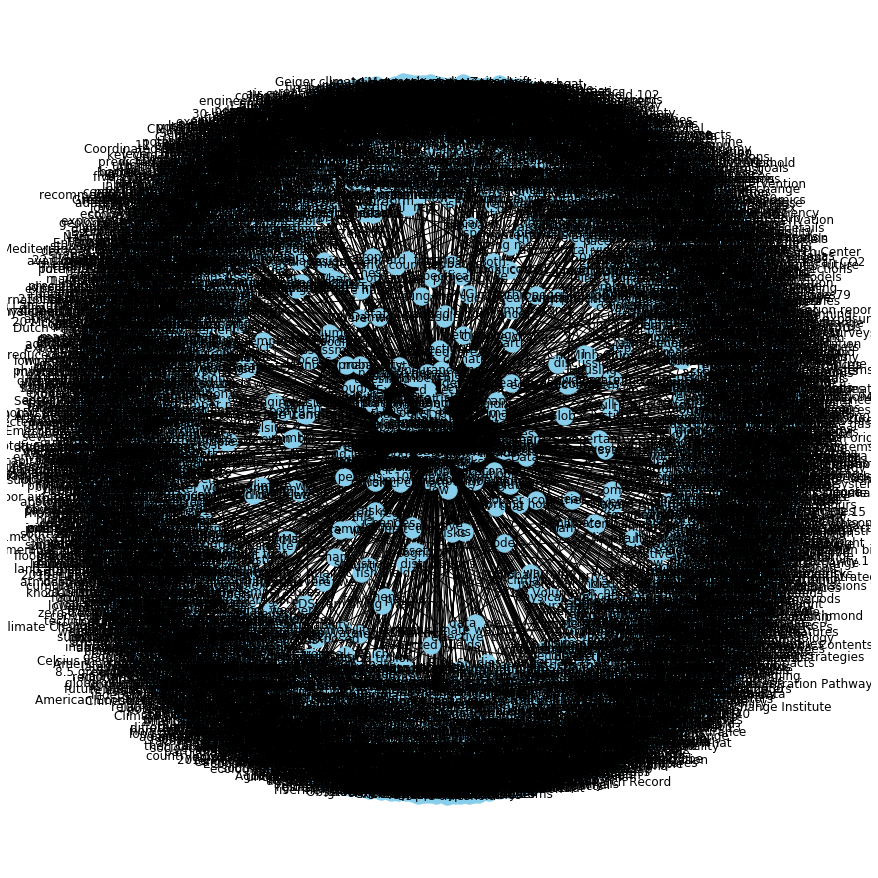

In [71]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [72]:
kg_df2.head(20)

source                    target        edge
0                                                            risk
1                                                         hazards
2                                                         January
3                                                       Institute
4                                                1990       Since
5          Recent  partners    digital Global experts   sought to
6            deeper  impact   global McKinsey economy        made
7      economic Michael MGI  Chinese Rajat management    includes
8                                                           Hazan
9                                                           Tonby
10                      MGI           three  McKinsey      led by
11     senior James Manyika          impact Sven Smit        help
12                                           findings    research
13        analytical  tools     chairs decision world    serve as
14                                   business leaders          In
15                                                MGI         Our
16  micro Susan methodology              MGI research      advise
17                                                         trends
18                       it            public  policy  understand
19                      MGI            senior  fellow        have

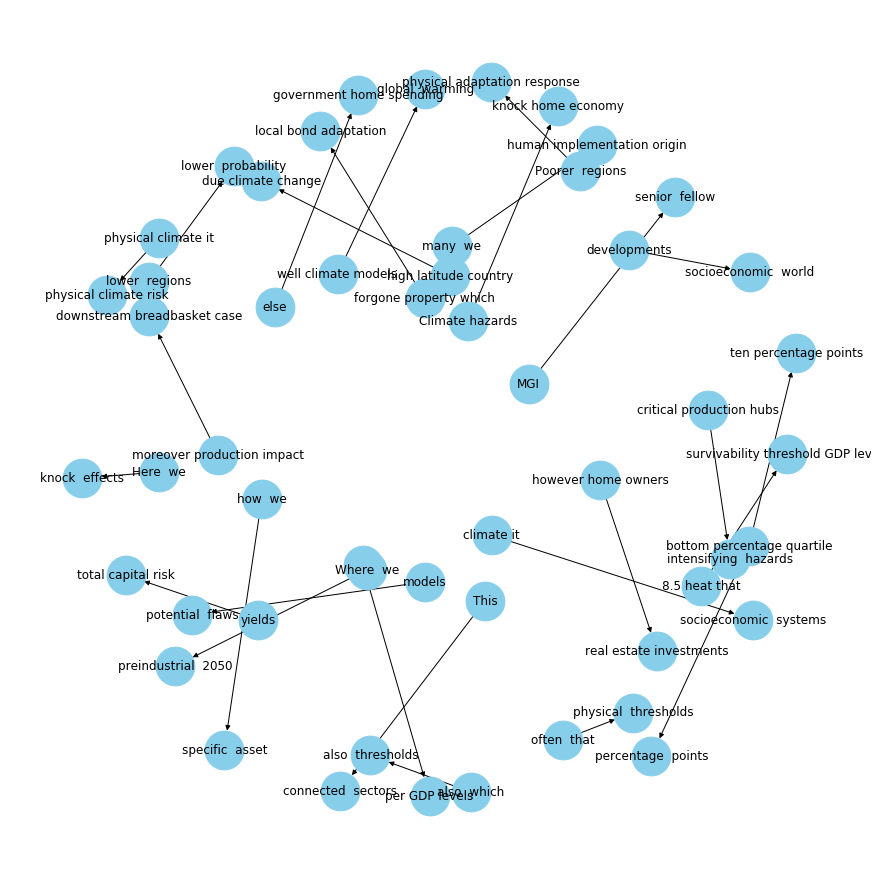

In [73]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['edge']=="have"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [74]:
len(kg_df2)

6304

In [75]:
edge_count = kg_df2.groupby("edge").size()
edge_count = edge_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
edge_count.head(20)

edge  size
0          is   151
1        risk    77
2     hazards    71
3         are    66
4    expected    66
5         See    61
6    increase    61
7           .    50
8     include    46
9        need    45
10       Note    43
11      Issue    43
12  Institute    42
13     Source    40
14          2    38
15  projected    37
16          1    37
17  corrected    36
18         be    35
19          3    31

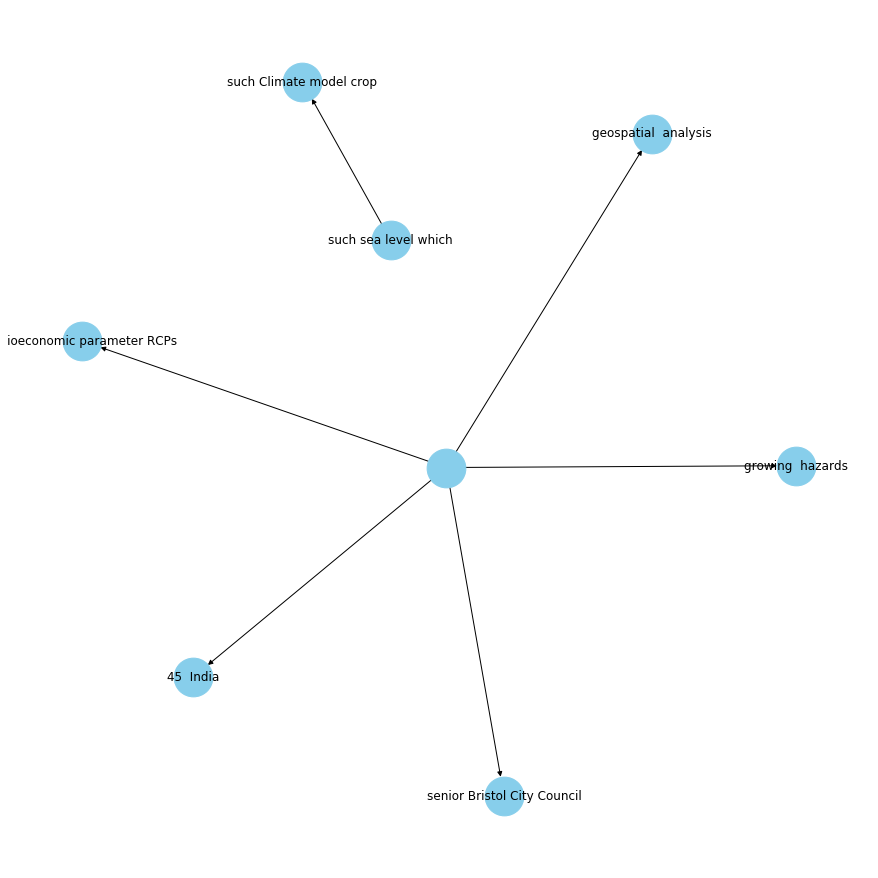

In [76]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['edge']=="hazards"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [77]:
source_count = kg_df2.groupby("source").size()
source_count = source_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
source_count.head(20)

source  size
0                             3528
1                         We    98
2                         we    72
3                       This    51
4               standard  we    32
5             Heat data bias    28
6                       that    28
7              Climate state    27
8           why Technical we    23
9                         it    21
10               projections    21
11                        us    18
12                      Risk    16
13              Water stress    15
14              ° C wet bulb    15
15                      They    15
16                 threshold    13
17       annual  probability    13
18               Risk values    12
19  Water stress projections    12

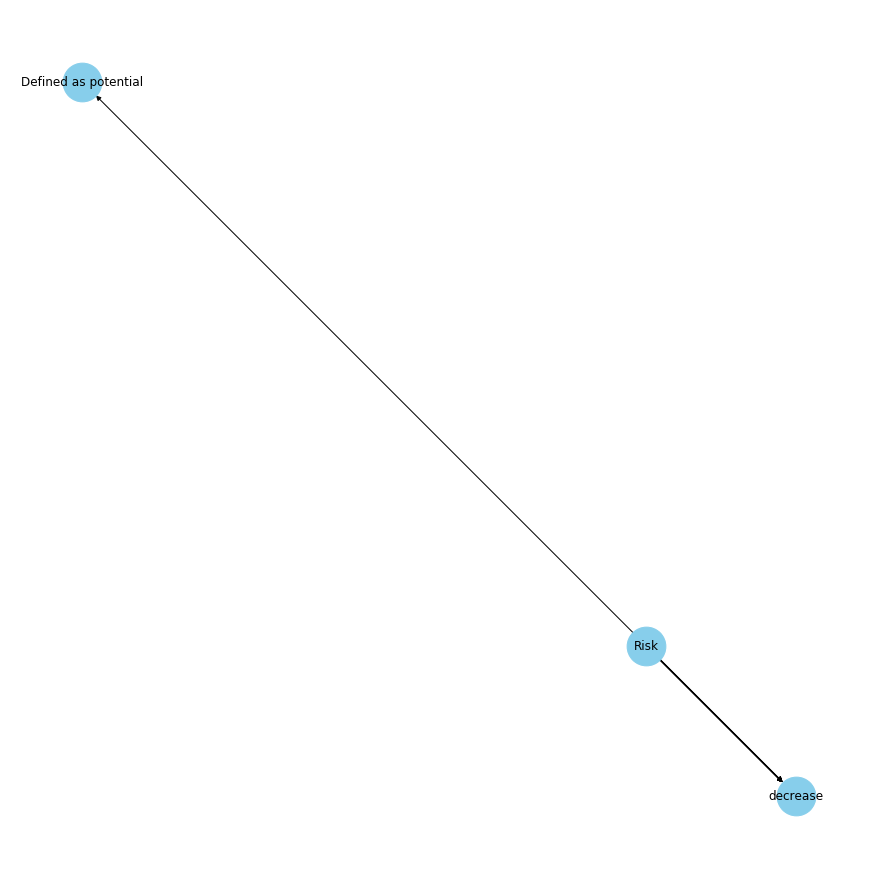

In [78]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['source']=="Risk"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

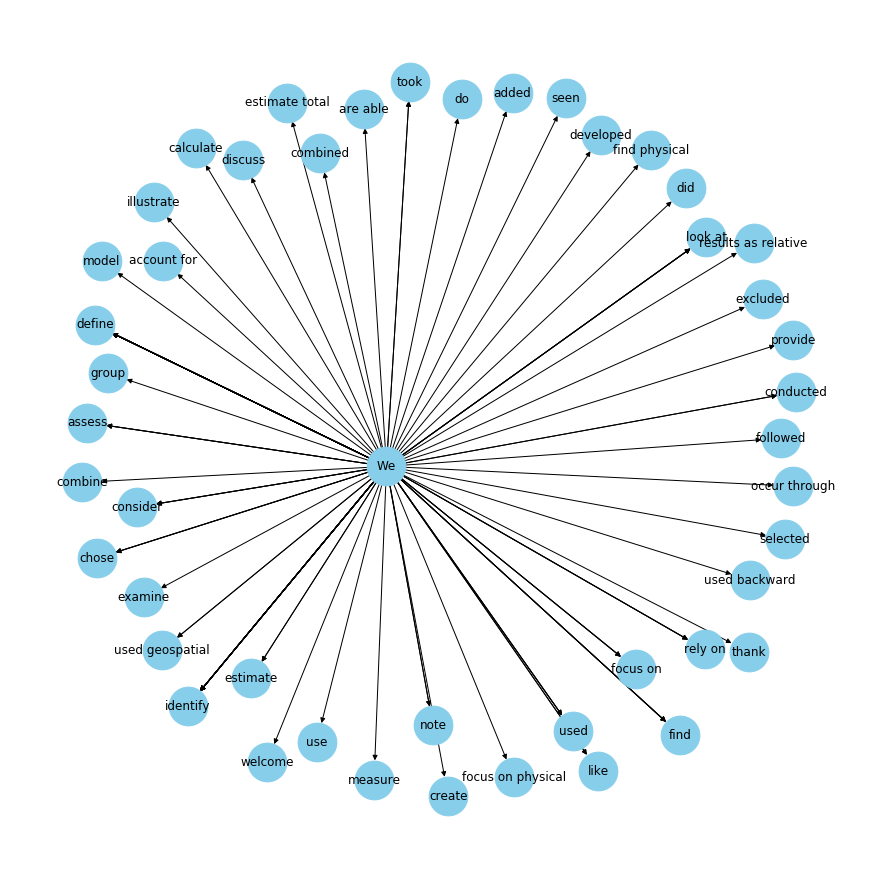

In [79]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['source']=="We"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [80]:
target_count = kg_df2.groupby("target").size()
target_count = target_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
target_count.head(20)

target  size
0                                 2740
1                            RCP    61
2                 climate change    35
3   climatic multidecade periods    31
4                  average  2041    29
5                           risk    21
6          atmospheric  aerosols    20
7               35 ° C threshold    15
8              changing  climate    15
9                  annual  water    13
10                         group    12
11                weighted  risk    12
12     low projection robustness    12
13                       climate    12
14                  ° C wet bulb    12
15           8.5 climate impacts    12
16        socioeconomic  systems    11
17         physical climate risk    10
18                    adaptation    10
19                  Other  group    10

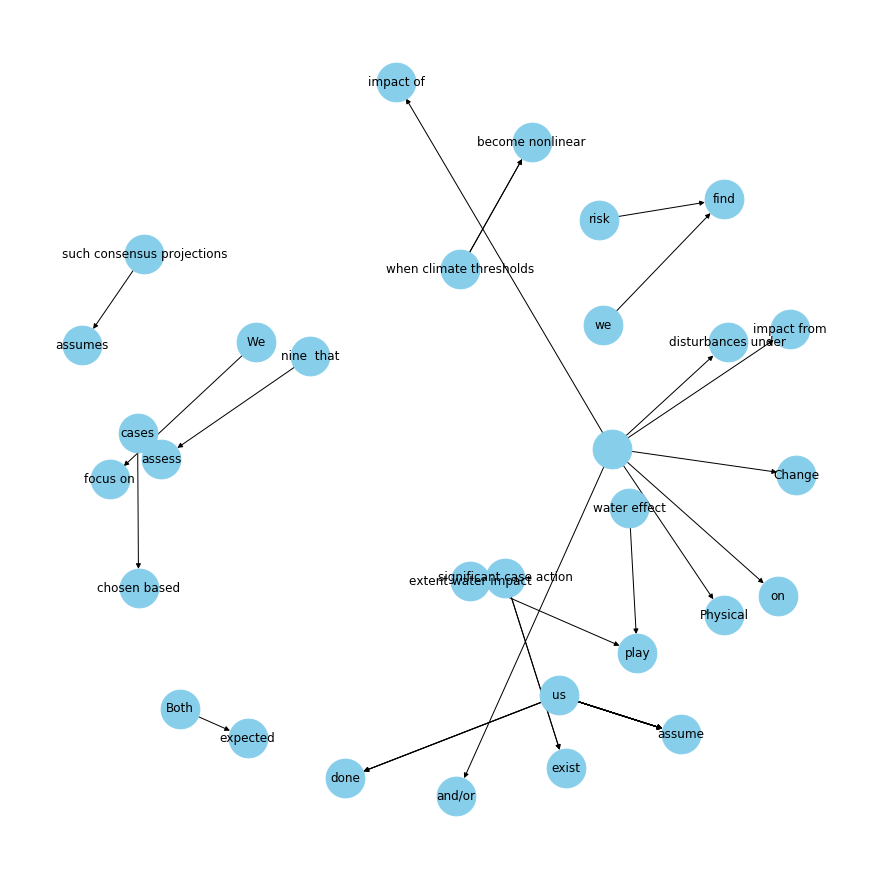

In [81]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['target']=="climate change"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()